## Variables

This whole experiment is based on Showing a Image of Kitten on the landing page and Identifying which one is the best

Question : will changing the homepage photo result in more "ADOPT Today" clicks?

Hypothesis: Using a photo of a cat wearing a hat will result in more "ADOPT TODAY!" clicks.

Dependent variable: Clicked "ADOPT TODAY!" button or not.

Independent variable:Homepage photo

## Importing modules

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.stats.power import TTestIndPower
import statsmodels.api as sm
from pandas import get_dummies
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from scipy.stats import linregress
from sklearn.linear_model import LogisticRegression
import ggplot
from pandas.lib import Timestamp


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\ProgramData\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\ProgramData\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [4]:
# importing the data in dataframe from csv
click_data = pd.read_csv("click_data.csv")

### Exploring the dataset 

In [5]:
click_data.head()

,visit_date,clicked_adopt_today
0,2017-01-01,1
1,2017-01-02,1
2,2017-01-03,0
3,2017-01-04,1
4,2017-01-05,1


In [6]:
click_data.dtypes

visit_date             object
clicked_adopt_today     int64
dtype: object

### Goals of A/B testing

The "hypothesis" for an A/B testing experiment refres to?

what you think will happen as a result of the experiment.

#### Preliminary data exploration

In [7]:
print('Minimum date: \n',np.min(click_data['visit_date']))
print('Maximum date: \n',np.max(click_data['visit_date']))

Minimum date: 
 2017-01-01
Maximum date: 
 2017-12-31


In [8]:
# Current conversion rate
click_mean = np.mean(click_data['clicked_adopt_today'])
print(click_mean)

0.2772602739726027


## Current conversion rate with seasonality

In [9]:
click_data['date'] = pd.to_datetime(click_data['visit_date'])

In [10]:
click_data['month'] = click_data['date'].dt.month

In [11]:
click_data['week'] = click_data['date'].dt.week

In [12]:
click_data['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [13]:
click_data.groupby(['month']).mean()

,clicked_adopt_today,week
month,,
1,0.196774,4.258065
2,0.189286,6.785714
3,0.145161,11.000000
4,0.150000,15.333333
5,0.258065,19.741935
6,0.333333,24.066667
7,0.348387,28.419355
8,0.541935,32.870968
9,0.293333,37.200000


### Current conversion rate day of Month

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


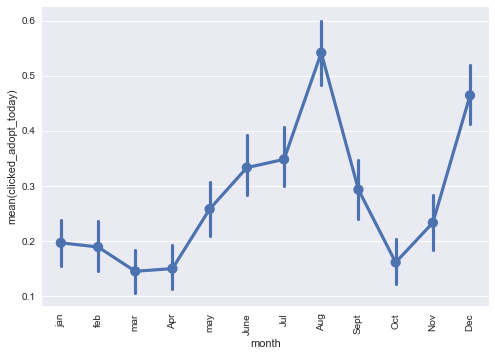

In [14]:
x = np.arange(12)
month = np.array(['jan','feb','mar','Apr','may','June','Jul','Aug','Sept','Oct','Nov','Dec'])
sns.pointplot(data=click_data,x='month',y='clicked_adopt_today')
plt.xticks(x, month, rotation='vertical')
plt.show()

### Current conversion rate day of week
let's start by computing our pre-experiment conversion rate as a baseline. Rather than computing it by month though, let's compute by day of the week. The core tidyverse packages and lubridate are pre-loaded for you.

In [15]:
click_data.groupby(['week']).mean().head()

,clicked_adopt_today,month
week,,
1,0.200000,1.000000
2,0.285714,1.000000
3,0.157143,1.000000
4,0.114286,1.000000
5,0.157143,1.714286


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


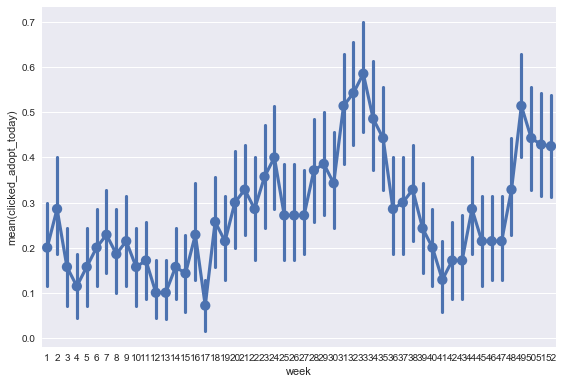

In [16]:
sns.pointplot(data=click_data,x='week',y='clicked_adopt_today')
plt.tight_layout()
plt.show()

### Randomized vs. sequential

You're designing a new experiment and you have two conditions. What's the best method for comparing your two conditions?

Run control and test conditions simultaneously for two months.


### Power Analysis

1. statistical test- statistical test you plan to run
2. baseline value - value for the current control condition
3. desired value - expected value for the test condition


proportion of the data from the test condition(ideally 0.5)


significance threshold/ alpha- level where effect significant(generally 0.05)

Power / 1 - beta- probability coorectly rejecting null hypothesis(generally 0.8)

### Power Analysis August

we were going to run the experiment in January. Run a new power analysis assuming we'll run the experiment in August. To compute the conversion rate for our control and test you'll need to look at the dataset. Be sure to round all values to the hundredth of a percent (e.g., 0.13453 to 0.13). 

In [17]:
# estimate sample size via power analysis

# parameters for power analysis
effect = 0.2
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=0.3, alpha=alpha)
print('Sample Size: %.3f' % result)


Sample Size: 851.773


In [18]:
experiment_data = pd.read_csv("experiment_data.csv")

In [19]:
experiment_data.head()

,visit_date,condition,clicked_adopt_today
0,2018-01-01,control,0
1,2018-01-01,control,1
2,2018-01-01,control,0
3,2018-01-01,control,0
4,2018-01-01,test,0


In [21]:
experiment_data['visit_date'].unique()

array(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
       '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
       '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
       '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
       '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
       '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
       '2018-01-29', '2018-01-30', '2018-01-31'], dtype=object)

In [22]:
for experiment_data['condtion'] in experiment_data.columns:
    if(experiment_data['condition'].dtype == 'object'):
        experiment_data['condition']= experiment_data['condition'].astype('category')
        experiment_data['condition'] = experiment_data['condition'].cat.codes

In [23]:
exp = experiment_data.groupby(['condition']).mean()
print(exp)

           clicked_adopt_today
condition                     
0                     0.166667
1                     0.384354


In [24]:
#conversion rate
expermnet_data_sum = experiment_data.groupby(['condition','visit_date']).mean()

In [25]:
expermnet_data_sum.head()

clicked_adopt_today
condition visit_date                     
0         2018-01-01             0.250000
          2018-01-02             0.250000
          2018-01-03             0.000000
          2018-01-04             0.363636
          2018-01-05             0.111111

In [27]:
"""x = np.arange(12)
month = np.array(['jan','feb','mar','Apr','may','June','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.tight_layout()
plt.show()"""

"x = np.arange(12)\nmonth = np.array(['jan','feb','mar','Apr','may','June','Jul','Aug','Sept','Oct','Nov','Dec'])\nplt.tight_layout()\nplt.show()"

In [28]:
experiment_data.head()

,visit_date,condition,clicked_adopt_today,condtion
0,2018-01-01,0,0,clicked_adopt_today
1,2018-01-01,0,1,clicked_adopt_today
2,2018-01-01,0,0,clicked_adopt_today
3,2018-01-01,0,0,clicked_adopt_today
4,2018-01-01,1,0,clicked_adopt_today


In [29]:
for experiment_data['condtion'] in experiment_data.columns:
    if(experiment_data['condition'].dtype == 'object'):
        experiment_data['condition']= experiment_data['condition'].astype('category')
        experiment_data['condition'] = experiment_data['condition'].cat.codes

In [30]:
X_ex = np.array(exp.index)
y_ex = np.array(exp[['clicked_adopt_today']])

model = sm.GLM(y_ex, X_ex, family=sm.families.Binomial())
modelfit = model.fit()
print(modelfit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    2
Model:                            GLM   Df Residuals:                        1
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1.3593
Date:                Wed, 29 Jan 2020   Deviance:                       2.3565
Time:                        11:05:02   Pearson chi2:                    0.444
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4711      2.056     -0.229      0.819      -4.500       3.558


In [31]:
eight_month_checked_in_data = pd.read_csv("eight_month_checkin_data.csv")

In [32]:
eight_month_checked_in_data.head()

,visit_date,condition,clicked_adopt_today
0,2018-01-01,cat_hat,1
1,2018-01-01,cat_hat,1
2,2018-01-01,cat_hat,0
3,2018-01-01,cat_hat,0
4,2018-01-01,cat_hat,0


In [33]:
eight_month_checked_in_data['date'] = pd.to_datetime(eight_month_checked_in_data['visit_date'])

In [34]:
eight_month_checked_in_data['month'] = eight_month_checked_in_data['date'].dt.month

In [35]:
eight_month_checked_in_data['month'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [36]:
for eight_month_checked_in_data['condtion'] in eight_month_checked_in_data.columns:
    if(eight_month_checked_in_data['condition'].dtype == 'object'):
        eight_month_checked_in_data['condition']= eight_month_checked_in_data['condition'].astype('category')
        eight_month_checked_in_data['condition'] = eight_month_checked_in_data['condition'].cat.codes

In [37]:
eight_month_sum = eight_month_checked_in_data.groupby(['month','condition']).aggregate(np.mean)
print(eight_month_sum)

                 clicked_adopt_today
month condition                     
1     0                     0.377419
      1                     0.164516
2     0                     0.353571
      1                     0.225000
3     0                     0.338710
      1                     0.135484
4     0                     0.343333
      1                     0.136667
5     0                     0.416129
      1                     0.267742
6     0                     0.543333
      1                     0.306667
7     0                     0.496774
      1                     0.345161
8     0                     0.793548
      1                     0.580645


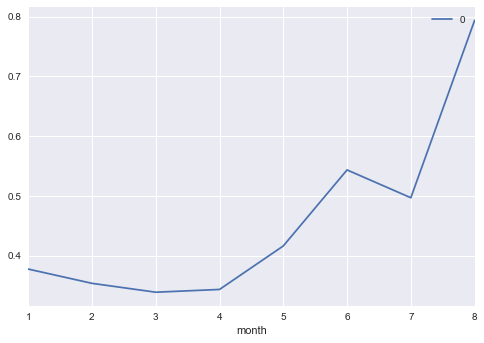

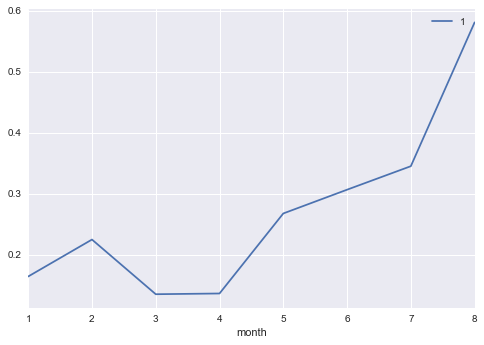

In [38]:
for index, group in eight_month_checked_in_data.groupby(['condition']):
    group_agg = group.groupby(['month']).aggregate(np.mean)
    group_agg.plot(y='clicked_adopt_today' ,label=index)

In [42]:
group_agg.head()

,condition,clicked_adopt_today
month,,
1,1,0.164516
2,1,0.225000
3,1,0.135484
4,1,0.136667
5,1,0.267742
